In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint

[-2.133243608132235e-29, 2.133243608132235e-29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7426272650147806e-19, 0.0]
[-2.133243608132235e-29, 2.133243608132235e-29, 7.406793973340203e-57, 0.0, 0.0, 0.0, 0.0, -8.18851883634505e-46, -1.7426272650147806e-19, 8.642309524211828e-46]
[-2.133243608132235e-29, 2.133243608132235e-29, 1.4813587946680406e-56, 5.892501852516026e-84, 0.0, 0.0, -2.0316832324724235e-71, -1.63770376726901e-45, -1.7426272650147806e-19, 1.7284619048423656e-45]
[-2.133243608132235e-29, 2.133243608132235e-29, 7.40827533213487e-53, 1.4737148017017863e-76, 1.2531181837577061e-103, -2.2946870250715088e-89, -5.0812400691660154e-64, -8.190156540112319e-42, -1.7426272650147806e-19, 8.64403798611667e-42]
[-2.133243608132235e-29, 2.133243608132235e-29, 1.4815069305475073e-52, 5.893680441274057e-76, 1.253368807375678e-99, -2.2951459624719346e-85, -2.0320895995941658e-63, -1.637867537645737e-41, -1.7426272650147806e-19, 1.72863475103285e-41]
[-2.133243608132235e-29, 2.133243608132235e-29, 2

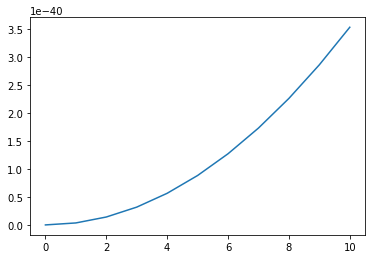

In [65]:
q=10 #number of surface proteins
Ccmc=0.2*10**(-6) #critical concentration,mole
alpha=2 #line energy kT 
beta=70*10**(6) #rate of attachment, Hz/meter
c1t0=10.0*10**(-6) #initial concentration, mole
Rh=0.619*10**(-6) #hydrodynamic radius, meter, estimated for 300 amino acid protein
R=np.sqrt(q)*Rh/2 #estimate for spherical capsid radius
T=293 #room temp, K
k=1.38064852*10**(-23) #boltzmann constant
Z= 0.9544*10**(-3) #viscosity room temp water, pascals
D1=k*T/(6*np.pi*Rh*Z)#diffusion coefficient
j=D1*2*R/q

init= [0]*q #empty conditions
init[0]=c1t0#adding initial concentration of subunits

t=np.linspace(0,10,11)#time values

def Con(cn,t):#builds a q size list of dcdt
    dcdt=[0]#initializes dcdt
    #solves for initial rate of formation
    dcdt[0]=(cn[0])*j*np.sqrt(q-1)*(-cn[0]+cn[1]*np.exp(alpha*(np.sqrt(2*q-4)+np.sqrt(q-1)))/(cn[0]*2/Ccmc))
    n = 1 #dummy1
    i = 1 #dummy2
    while i < q-1:
        n=i+1
        if n == q-1:
            dcdt.append(cn[0]*j*np.sqrt((q-1))*cn[q-1]-cn[0]*j*np.sqrt(q+1)*np.exp(np.sqrt(q-1)-1)*(cn[0]*2/Ccmc)**2)#ending rate adjustment
        bn=cn[0]*j*np.sqrt(n*(q-n))#binding energy for capsid size n
        bnm1=cn[0]*j*np.sqrt((n-1)*(q-n+1))#binding energy for capsid size n+1
        Gn=n*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt(n*(q-n))#free energy for capsid size n
        Gnp1=(n+1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n+1)*(q-n-1))#free energy for capsid size n+1
        Gnm1=(n-1)*np.log(cn[0]*2/Ccmc)+alpha*np.sqrt((n-1)*(q-n+1))#free energy for capsid size n-1
        alpn=bnm1*np.exp(Gn-Gnm1)#unbinding energy for capsid size n
        alpnp1=bn*np.exp(Gnp1-Gn)#unbinding energy for capsid size n+1
        dcdt.append(bnm1*cn[i-1]-alpn*cn[i]-bn*cn[i]+alpnp1*cn[i+1])#list of rates for all Cn at specific time
        i+=1
    #v rate of complete capsid formation
    print(dcdt)
    return(dcdt)


x=odeint(Con,init,t)#integrates rates to give txq matrix of concetrations of each size of capsid at each time step
Cq= x[:,q-1]#concentration of complete capsids as a function of time



plt.plot(t,Cq)